In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib
import tensorflow as tf
import keras
import seaborn as sn

%matplotlib inline

In [36]:
df = pd.read_csv("An ANN Model for predicting distance learning students performance.csv")
df.sample(5)

,Timestamp,OnlineClassParticipation,AssignmentSubmission,EarlyRegistration,ParentGuardianEducation,PerformanceInSecondarySchool,OnlinePracticalTest,StudentLocation,FastInternetService,FinancialAssistance
481,2020/12/01 11:31:14 am CET,Low,High,Yes,Medium,Medium,Medium,Urban,Yes,Medium
560,2020/11/30 3:40:44 pm CET,High,High,Yes,Low,Low,Low,Rural,No,High
315,2020/12/01 1:42:09 am CET,High,Medium,Yes,High,High,Medium,Urban,Yes,High
193,2020/12/01 11:00:07 am CET,Medium,Medium,No,High,High,High,Urban,Yes,High
805,2020/12/01 12:45:52 pm CET,Medium,Low,Yes,Medium,Medium,Medium,Urban,Yes,Medium


In [37]:
df.drop('Timestamp', axis='columns', inplace=True)
df.dtypes

OnlineClassParticipation        object
AssignmentSubmission            object
EarlyRegistration               object
ParentGuardianEducation         object
PerformanceInSecondarySchool    object
OnlinePracticalTest             object
StudentLocation                 object
FastInternetService             object
FinancialAssistance             object
dtype: object

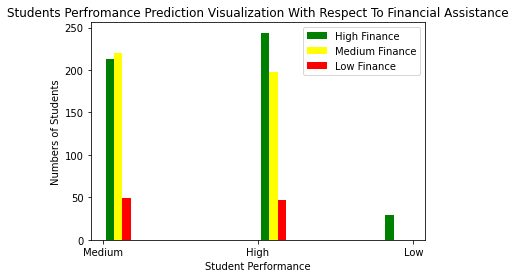

In [38]:
high_fin = df[df.FinancialAssistance=='High'].OnlinePracticalTest
med_fin = df[df.FinancialAssistance=='Medium'].OnlinePracticalTest
low_fin = df[df.FinancialAssistance=='Low'].OnlinePracticalTest

plt.xlabel('Student Performance')
plt.ylabel('Numbers of Students')
plt.title('Students Perfromance Prediction Visualization With Respect To Financial Assistance')

plt.hist([high_fin,med_fin,low_fin],color=['green','yellow','red'],label=['High Finance','Medium Finance','Low Finance'])
plt.legend()

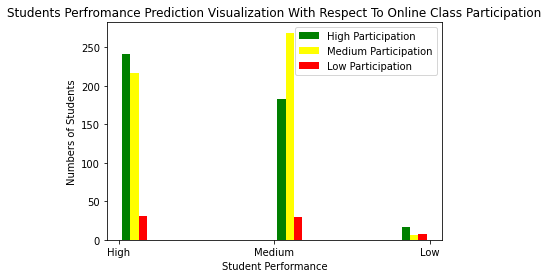

In [39]:
high_part = df[df.OnlineClassParticipation=='High'].OnlinePracticalTest
med_part = df[df.OnlineClassParticipation=='Medium'].OnlinePracticalTest
low_part = df[df.OnlineClassParticipation=='Low'].OnlinePracticalTest

plt.xlabel('Student Performance')
plt.ylabel('Numbers of Students')
plt.title('Students Perfromance Prediction Visualization With Respect To Online Class Participation')

plt.hist([high_part,med_part,low_part],color=['green','yellow','red'],label=['High Participation','Medium Participation','Low Participation'])
plt.legend()

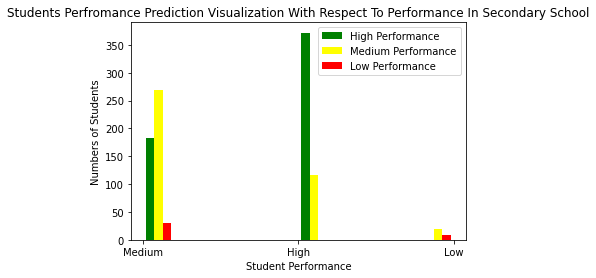

In [40]:
high_perf = df[df.PerformanceInSecondarySchool=='High'].OnlinePracticalTest
med_perf = df[df.PerformanceInSecondarySchool=='Medium'].OnlinePracticalTest
low_perf = df[df.PerformanceInSecondarySchool=='Low'].OnlinePracticalTest

plt.xlabel('Student Performance')
plt.ylabel('Numbers of Students')
plt.title('Students Perfromance Prediction Visualization With Respect To Performance In Secondary School')

plt.hist([high_perf,med_perf,low_perf],color=['green','yellow','red'],label=['High Performance','Medium Performance','Low Performance'])
plt.legend()

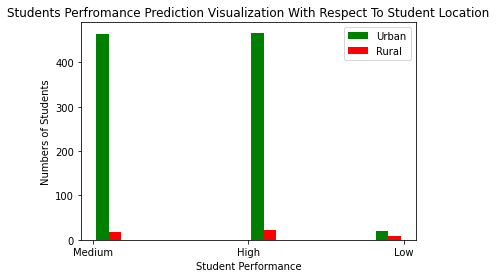

In [41]:
urban_area = df[df.StudentLocation=='Urban'].OnlinePracticalTest
rural_area = df[df.StudentLocation=='Rural'].OnlinePracticalTest

plt.xlabel('Student Performance')
plt.ylabel('Numbers of Students')
plt.title('Students Perfromance Prediction Visualization With Respect To Student Location')

plt.hist([urban_area,rural_area],color=['green','red'],label=['Urban','Rural'])
plt.legend()

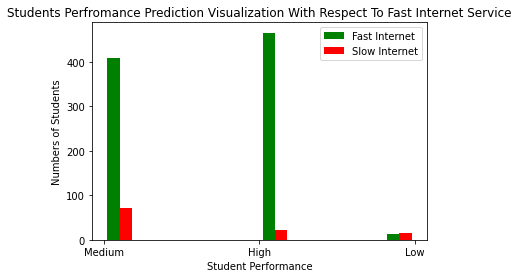

In [42]:
fast_int = df[df.FastInternetService=='Yes'].OnlinePracticalTest
slow_int = df[df.FastInternetService=='No'].OnlinePracticalTest

plt.xlabel('Student Performance')
plt.ylabel('Numbers of Students')
plt.title('Students Perfromance Prediction Visualization With Respect To Fast Internet Service')

plt.hist([fast_int,slow_int],color=['green','red'],label=['Fast Internet','Slow Internet'])
plt.legend()

In [43]:
def print_column_unique_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}: {df[column].unique()}')

In [44]:
print_column_unique_values(df)

OnlineClassParticipation: ['Medium' 'High' 'Low']
AssignmentSubmission: ['High' 'Medium' 'Low']
EarlyRegistration: ['Yes' 'No']
ParentGuardianEducation: ['Medium' 'High' 'Low']
PerformanceInSecondarySchool: ['High' 'Medium' 'Low']
OnlinePracticalTest: ['Medium' 'High' 'Low']
StudentLocation: ['Urban' 'Rural']
FastInternetService: ['Yes' 'No']
FinancialAssistance: ['High' 'Medium' 'Low']


In [45]:
df['StudentLocation'].replace({'Urban': 1, 'Rural': 0},inplace=True)

In [46]:
yes_no_cols = ['EarlyRegistration', 'FastInternetService']
    
for col in yes_no_cols:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

In [47]:
for column in df:
    print(f'{column}: {df[column].unique()}')

OnlineClassParticipation: ['Medium' 'High' 'Low']
AssignmentSubmission: ['High' 'Medium' 'Low']
EarlyRegistration: [1 0]
ParentGuardianEducation: ['Medium' 'High' 'Low']
PerformanceInSecondarySchool: ['High' 'Medium' 'Low']
OnlinePracticalTest: ['Medium' 'High' 'Low']
StudentLocation: [1 0]
FastInternetService: [1 0]
FinancialAssistance: ['High' 'Medium' 'Low']


In [48]:
df = pd.get_dummies(data=df, columns=['OnlineClassParticipation','AssignmentSubmission','ParentGuardianEducation',
                     'PerformanceInSecondarySchool','OnlinePracticalTest','FinancialAssistance'])
df.columns

Index(['EarlyRegistration', 'StudentLocation', 'FastInternetService',
       'OnlineClassParticipation_High', 'OnlineClassParticipation_Low',
       'OnlineClassParticipation_Medium', 'AssignmentSubmission_High',
       'AssignmentSubmission_Low', 'AssignmentSubmission_Medium',
       'ParentGuardianEducation_High', 'ParentGuardianEducation_Low',
       'ParentGuardianEducation_Medium', 'PerformanceInSecondarySchool_High',
       'PerformanceInSecondarySchool_Low',
       'PerformanceInSecondarySchool_Medium', 'OnlinePracticalTest_High',
       'OnlinePracticalTest_Low', 'OnlinePracticalTest_Medium',
       'FinancialAssistance_High', 'FinancialAssistance_Low',
       'FinancialAssistance_Medium'],
      dtype='object')

In [49]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df['OnlinePracticalTest'] = scaler.fit_transform(df['OnlinePracticalTest'])

In [50]:
for column in df:
    print(f'{column}: {df[column].unique()}')

EarlyRegistration: [1 0]
StudentLocation: [1 0]
FastInternetService: [1 0]
OnlineClassParticipation_High: [0 1]
OnlineClassParticipation_Low: [0 1]
OnlineClassParticipation_Medium: [1 0]
AssignmentSubmission_High: [1 0]
AssignmentSubmission_Low: [0 1]
AssignmentSubmission_Medium: [0 1]
ParentGuardianEducation_High: [0 1]
ParentGuardianEducation_Low: [0 1]
ParentGuardianEducation_Medium: [1 0]
PerformanceInSecondarySchool_High: [1 0]
PerformanceInSecondarySchool_Low: [0 1]
PerformanceInSecondarySchool_Medium: [0 1]
OnlinePracticalTest_High: [0 1]
OnlinePracticalTest_Low: [0 1]
OnlinePracticalTest_Medium: [1 0]
FinancialAssistance_High: [1 0]
FinancialAssistance_Low: [0 1]
FinancialAssistance_Medium: [0 1]


In [51]:
df.dtypes

EarlyRegistration                      int64
StudentLocation                        int64
FastInternetService                    int64
OnlineClassParticipation_High          uint8
OnlineClassParticipation_Low           uint8
OnlineClassParticipation_Medium        uint8
AssignmentSubmission_High              uint8
AssignmentSubmission_Low               uint8
AssignmentSubmission_Medium            uint8
ParentGuardianEducation_High           uint8
ParentGuardianEducation_Low            uint8
ParentGuardianEducation_Medium         uint8
PerformanceInSecondarySchool_High      uint8
PerformanceInSecondarySchool_Low       uint8
PerformanceInSecondarySchool_Medium    uint8
OnlinePracticalTest_High               uint8
OnlinePracticalTest_Low                uint8
OnlinePracticalTest_Medium             uint8
FinancialAssistance_High               uint8
FinancialAssistance_Low                uint8
FinancialAssistance_Medium             uint8
dtype: object

In [52]:
df.sample(5)

,EarlyRegistration,StudentLocation,FastInternetService,OnlineClassParticipation_High,OnlineClassParticipation_Low,OnlineClassParticipation_Medium,AssignmentSubmission_High,AssignmentSubmission_Low,AssignmentSubmission_Medium,ParentGuardianEducation_High,...,ParentGuardianEducation_Medium,PerformanceInSecondarySchool_High,PerformanceInSecondarySchool_Low,PerformanceInSecondarySchool_Medium,OnlinePracticalTest_High,OnlinePracticalTest_Low,OnlinePracticalTest_Medium,FinancialAssistance_High,FinancialAssistance_Low,FinancialAssistance_Medium
857,1,1,1,0,1,0,0,0,1,0,...,1,0,0,1,1,0,0,1,0,0
796,0,1,1,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
758,0,1,1,0,0,1,1,0,0,1,...,0,1,0,0,1,0,0,0,0,1
435,1,0,1,0,1,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1
851,0,1,1,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0


In [53]:
X = df.drop(['OnlinePracticalTest_High','OnlinePracticalTest_Medium','OnlinePracticalTest_Low'],axis='columns')
y = df['OnlinePracticalTest_High']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [55]:
X_train.shape

(800, 18)

In [56]:
X_test.shape

(200, 18)

In [57]:
len(X_train.columns)

18

In [58]:
model = keras.Sequential([
    keras.layers.Dense(16, input_shape=(18,), activation='relu'),
    keras.layers.Dense(14, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7115 - accuracy: 0.4888
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.5163
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6534 - accuracy: 0.6637
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6301 - accuracy: 0.7113
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6073 - accuracy: 0.7200
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5875 - accuracy: 0.7275
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5711 - accuracy: 0.7250
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5571 - accuracy: 0.7350
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5462 - accuracy: 0.7462
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5354 - accuracy: 0.7437
Epoch 11/

25/25 [==============================] - 0s 2ms/step - loss: 0.3756 - accuracy: 0.8413
Epoch 84/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3746 - accuracy: 0.8438
Epoch 85/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3737 - accuracy: 0.8425
Epoch 86/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3744 - accuracy: 0.8400
Epoch 87/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3764 - accuracy: 0.8325
Epoch 88/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3763 - accuracy: 0.8363
Epoch 89/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3742 - accuracy: 0.8363
Epoch 90/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3733 - accuracy: 0.8375
Epoch 91/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3702 - accuracy: 0.8425
Epoch 92/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3718 - accuracy: 0.8363
Epoch 93/100


In [59]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.4341 - accuracy: 0.7750


[0.4340726435184479, 0.7749999761581421]

In [60]:
y_pred = model.predict(X_test)
y_pred[:10]

array([[0.0165427 ],
       [0.7781807 ],
       [0.4577452 ],
       [0.0053215 ],
       [0.44501892],
       [0.90140504],
       [0.74173546],
       [0.4023828 ],
       [0.686993  ],
       [0.10314563]], dtype=float32)

In [61]:
y_test[:10]

544    0
515    1
193    1
11     0
279    0
653    1
643    1
763    0
198    1
721    0
Name: OnlinePracticalTest_High, dtype: uint8

In [62]:
y_pred_output = []
for elem in y_pred:
    if elem >= 0.5:
        y_pred_output.append(1)
    else:
        y_pred_output.append(0)

In [63]:
y_pred_output[:10]

[0, 1, 0, 0, 0, 1, 1, 0, 1, 0]

In [64]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred_output))

              precision    recall  f1-score   support

           0       0.82      0.75      0.79       110
           1       0.73      0.80      0.76        90

    accuracy                           0.78       200
   macro avg       0.77      0.78      0.77       200
weighted avg       0.78      0.78      0.78       200



Text(69.0, 0.5, 'Truth')

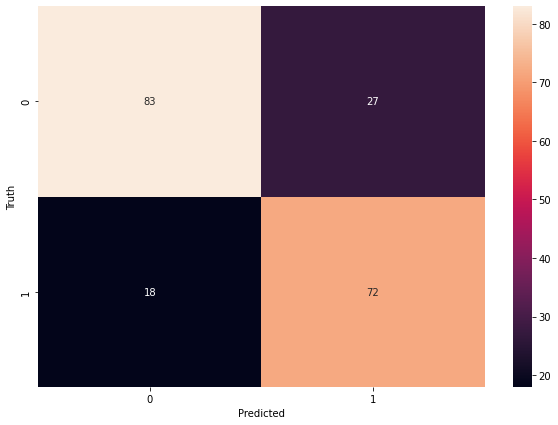

In [65]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_output)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [66]:
score = accuracy_score(y_test, y_pred_output)
score

0.775

In [67]:
# save trained model
# joblib.dump(model, 'student_performance_predictor.joblib')

In [68]:
# load trained model
# model = joblib.load('student_performance_predictor.joblib')